In [117]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

In [118]:
# Name of the new cleaned CSV file 
file = Path('Cleaned_WineQualityData.csv')
# Read the CSV in pandas
df = pd.read_csv(file)
# Preview of the DataFrame
df.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
1,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
2,6,5.5,-0.220,0.39,1.8,-0.277,62.0,180.0,0.94724,3.09,0.75,12.6,0,8,4.0
3,0,-17.2,0.520,0.15,-33.8,-0.022,551.0,65.0,0.99340,4.31,0.56,13.1,1,5,1.0
4,3,6.0,0.330,-1.06,3.0,0.518,5.0,378.0,0.96643,3.55,-0.86,3.9,1,7,2.0


In [119]:
df.corr()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
TARGET,1.000000,-0.012538,-0.075998,0.002345,0.003520,-0.030430,0.022640,0.021602,-0.047599,0.000220,-0.021220,0.073777,0.497946,-0.167643,0.554686
FixedAcidity,-0.012538,1.000000,0.019011,0.014000,-0.015429,-0.006104,0.015438,-0.023323,0.011574,-0.004554,0.042229,-0.013085,0.011376,0.154168,-0.004937
VolatileAcidity,-0.075998,0.019011,1.000000,-0.023432,0.001528,0.014849,-0.011441,-0.000743,0.013098,0.007203,0.001516,0.000260,-0.020242,0.025053,-0.040243
CitricAcid,0.002345,0.014000,-0.023432,1.000000,-0.009843,-0.033561,0.012113,-0.009917,-0.016992,-0.000758,-0.014424,0.016986,0.015332,0.054584,0.007140
ResidualSugar,0.003520,-0.015429,0.001528,-0.009843,1.000000,0.004122,0.021959,0.017031,-0.007121,0.017564,-0.002706,-0.018943,-0.004579,-0.020302,0.019666
Chlorides,-0.030430,-0.006104,0.014849,-0.033561,0.004122,1.000000,-0.020492,0.000419,0.020672,-0.017970,0.002619,-0.022885,-0.006387,-0.001713,-0.006324
FreeSulfurDioxide,0.022640,0.015438,-0.011441,0.012113,0.021959,-0.020492,1.000000,0.013462,-0.008664,-0.002009,0.026829,-0.023867,0.014960,-0.014734,-0.015390
TotalSulfurDioxide,0.021602,-0.023323,-0.000743,-0.009917,0.017031,0.000419,0.013462,1.000000,0.023168,-0.003423,0.002504,-0.016852,-0.002724,-0.022129,0.022095
Density,-0.047599,0.011574,0.013098,-0.016992,-0.007121,0.020672,-0.008664,0.023168,1.000000,-0.002019,-0.010609,-0.006128,-0.018094,0.047779,-0.028492
pH,0.000220,-0.004554,0.007203,-0.000758,0.017564,-0.017970,-0.002009,-0.003423,-0.002019,1.000000,0.010449,-0.012203,0.000218,-0.053713,-0.004400


In [120]:
mean_df = df.groupby('LabelAppeal').mean()
mean_df.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,AcidIndex,STARS
LabelAppeal,,,,,,,,,,,,,,
-2,1.920792,7.036139,0.405891,0.293713,6.828218,0.067520,19.252475,122.185644,0.993760,3.203713,0.512228,11.001980,7.643564,1.405941
-1,2.712796,6.656015,0.315226,0.288873,6.167803,0.051305,31.367524,127.940542,0.994703,3.187309,0.511426,10.557742,7.650209,1.691933
0,3.642638,6.954322,0.298044,0.323259,4.950888,0.043983,31.669115,124.169457,0.993825,3.203946,0.492750,10.506381,7.642638,2.021182
1,4.526119,6.841760,0.282006,0.330864,5.890983,0.050745,37.080224,123.073072,0.992203,3.179789,0.520647,10.548843,7.636194,2.356343
2,5.310345,7.266284,0.310709,0.320192,5.529885,0.042015,28.819923,130.114943,0.995968,3.229119,0.517816,10.904572,7.819923,2.681992


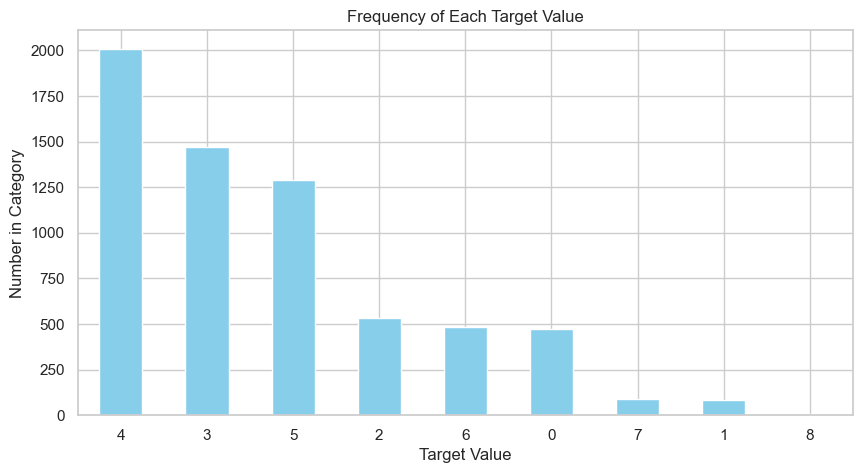

In [121]:
target_counts = df['TARGET'].value_counts()
# Create a bar plot
plt.figure(figsize=(10, 5))
target_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Target Value')
plt.xlabel('Target Value')
plt.ylabel('Number in Category')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

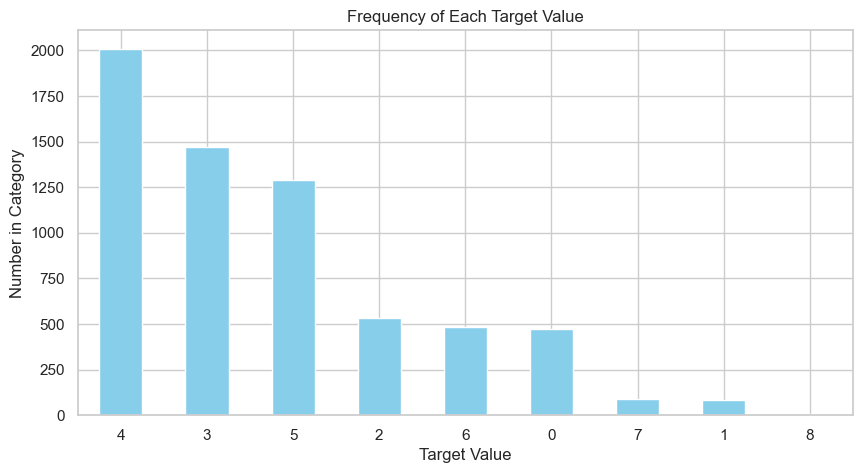

In [122]:
target_counts = df['TARGET'].value_counts()
# Create a bar plot
plt.figure(figsize=(10, 5))
target_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Target Value')
plt.xlabel('Target Value')
plt.ylabel('Number in Category')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

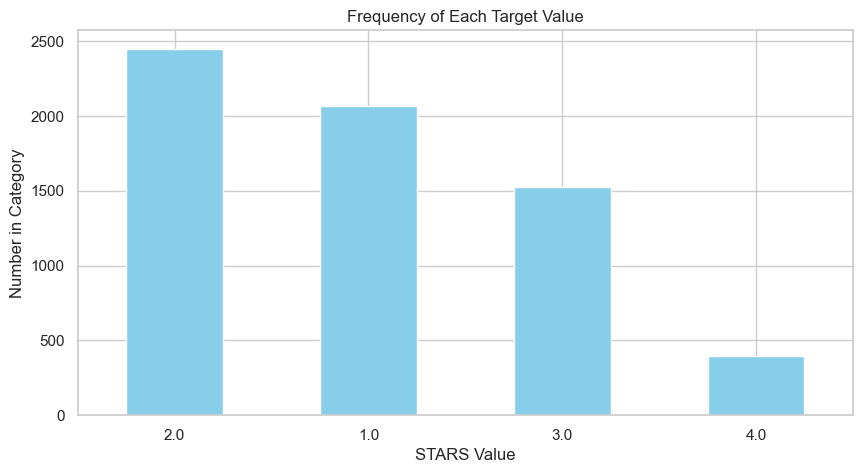

In [123]:
target_counts = df['STARS'].value_counts()
# Create a bar plot
plt.figure(figsize=(10, 5))
target_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Target Value')
plt.xlabel('STARS Value')
plt.ylabel('Number in Category')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

c:\Users\Lori Bissell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


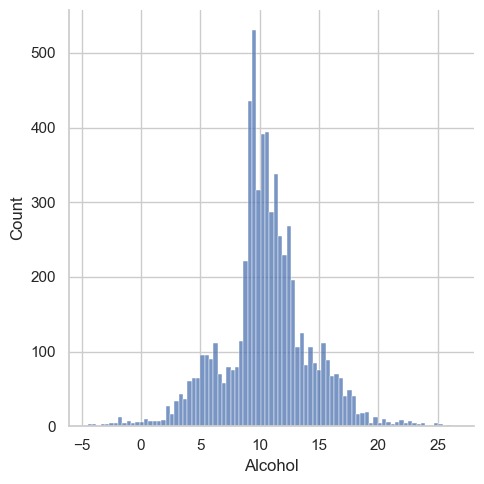

In [124]:
sns.displot(df['Alcohol'])

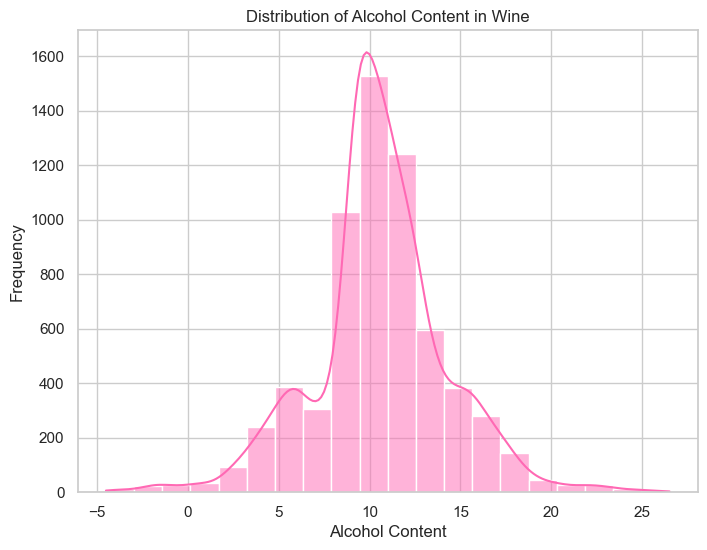

In [125]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(df['Alcohol'], bins=20, kde=True, color='hotpink')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.title('Distribution of Alcohol Content in Wine')
plt.show()

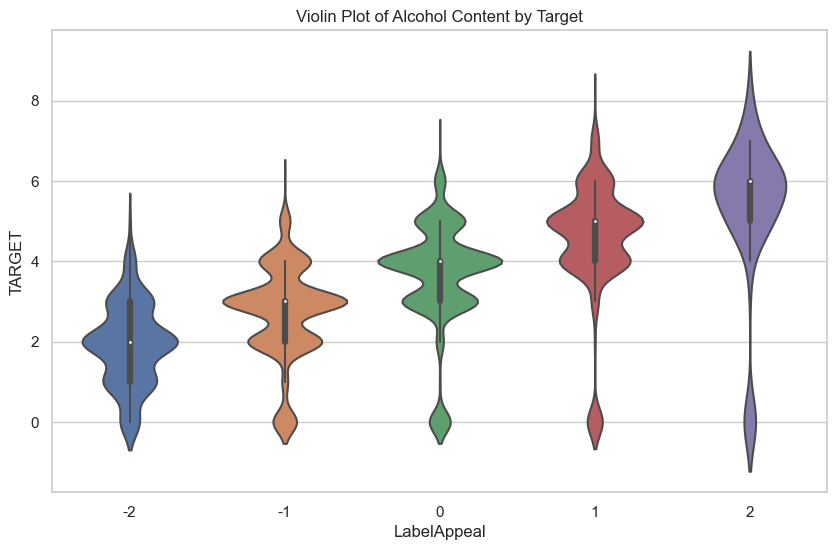

In [126]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='LabelAppeal', y='TARGET', data=df)
plt.title('Violin Plot of Alcohol Content by Target')
plt.xlabel('LabelAppeal')
plt.ylabel('TARGET')
plt.show()

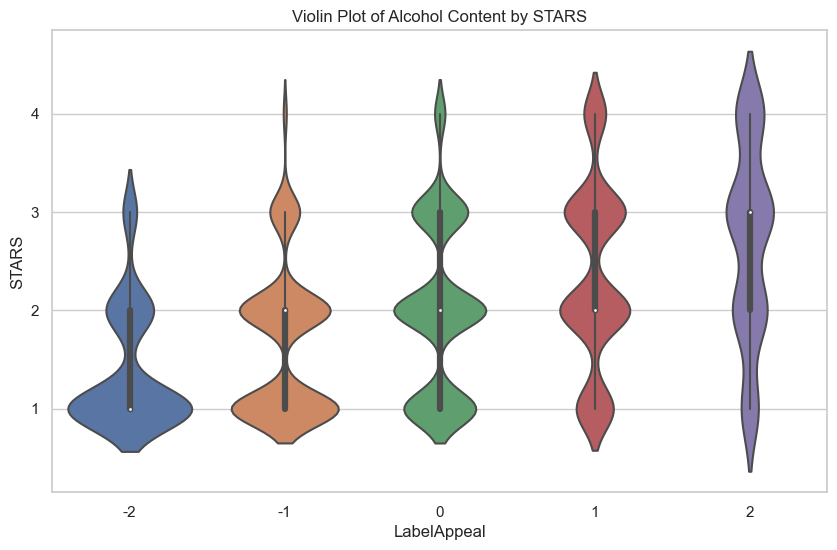

In [127]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='LabelAppeal', y='STARS', data=df)
plt.title('Violin Plot of Alcohol Content by STARS')
plt.xlabel('LabelAppeal')
plt.ylabel('STARS')
plt.show()

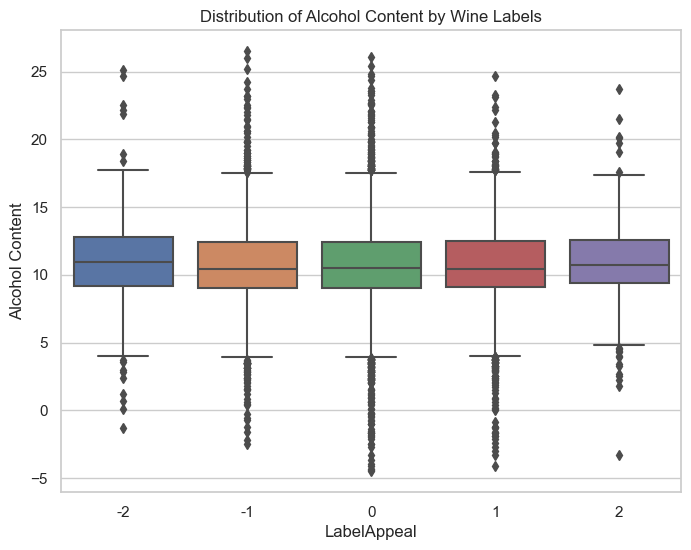

In [128]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='LabelAppeal', y='Alcohol', data=df)
plt.xlabel('LabelAppeal')
plt.ylabel('Alcohol Content')
plt.title('Distribution of Alcohol Content by Wine Labels')
plt.show()

<Axes: >

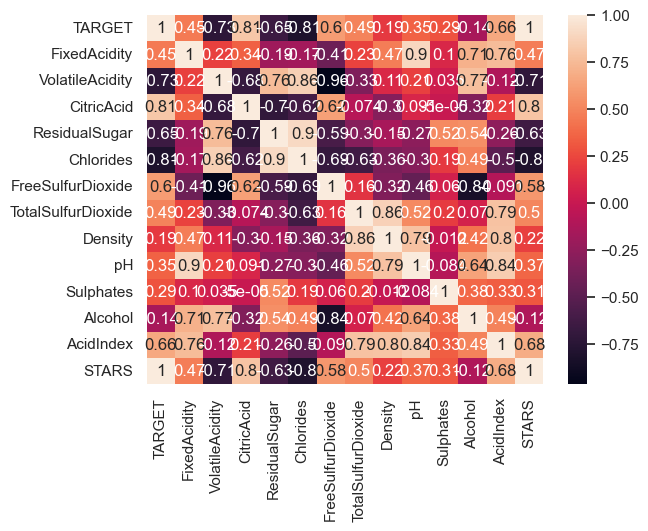

In [129]:
corr = mean_df.corr()
sns.heatmap(corr,annot=True)

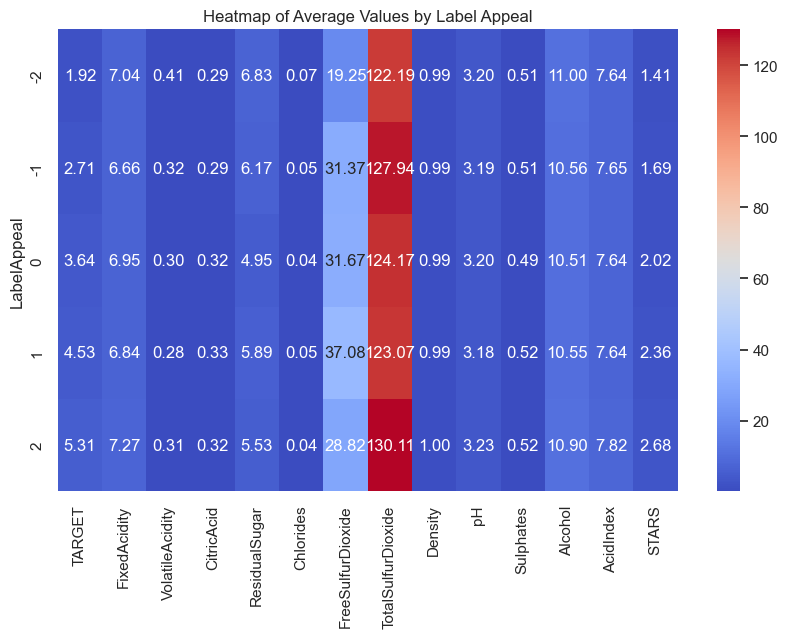

In [130]:
plt.figure(figsize=(10, 6))
sns.heatmap(mean_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Average Values by Label Appeal')
plt.show()

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [132]:
df['STARS'] = df['STARS'].astype('int') -1
df.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,2
1,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,0
2,6,5.5,-0.220,0.39,1.8,-0.277,62.0,180.0,0.94724,3.09,0.75,12.6,0,8,3
3,0,-17.2,0.520,0.15,-33.8,-0.022,551.0,65.0,0.99340,4.31,0.56,13.1,1,5,0
4,3,6.0,0.330,-1.06,3.0,0.518,5.0,378.0,0.96643,3.55,-0.86,3.9,1,7,1


In [133]:
df['STARS'].value_counts()


STARS
1    2450
0    2065
2    1527
3     394
Name: count, dtype: int64

In [170]:
df0 = df[df['STARS'] == 0].sample(1000, random_state=1, replace=True)
df1 = df[df['STARS'] == 1].sample(1000, random_state=1, replace=True)
df2 = df[df['STARS'] == 2].sample(1000, random_state=1, replace=True)
df3 = df[df['STARS'] == 3].sample(1000, random_state=1, replace=True)

df_all = pd.concat([df0,df1,df2,df3], axis=0)

df_all

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
1320,4,7.3,-0.760,2.27,-2.45,0.066,50.0,134.0,0.99980,4.00,-0.76,2.40,-1,8,0
5132,3,-1.7,1.230,1.59,-7.20,-0.246,-76.0,159.0,0.99768,5.57,-1.98,5.00,-1,8,0
1026,3,13.2,0.240,3.12,80.30,0.035,60.0,-32.0,0.95411,2.80,0.44,9.60,-1,6,0
2821,0,6.5,-0.375,0.00,1.90,0.065,41.0,294.0,0.99507,2.15,1.74,16.00,-1,7,0
4626,0,5.2,2.860,0.49,-3.40,-0.126,-121.0,-323.0,0.98266,4.10,2.32,12.90,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5383,6,9.6,0.400,-0.99,45.90,-0.326,386.0,-130.0,0.99500,3.20,-0.86,7.50,2,8,3
4849,6,6.0,-0.840,0.33,19.80,0.036,30.0,-135.0,0.99362,4.17,0.70,15.45,1,7,3
5101,5,6.5,0.180,0.26,-18.60,-0.284,40.0,-116.0,0.99410,4.19,0.72,7.60,1,7,3
442,6,15.4,1.140,-0.33,1.30,-1.044,36.0,95.0,0.98889,1.27,0.64,17.50,1,6,3


In [171]:
# X variable is target 
X = df_all.drop(columns=['STARS', 'TARGET'])

# Y variable is all features except target
y = df_all[['STARS']]


In [172]:
# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [173]:
y_train['STARS'].value_counts()

STARS
1    750
0    750
2    750
3    750
Name: count, dtype: int64

In [94]:
# from imblearn.combine import SMOTEENN
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split

# # Instantiate SMOTE with desired parameters
# smote = SMOTEENN(sampling_strategy='auto', random_state=42)
# # Fit SMOTE to the training data and oversample the minority class
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# # Now X_train_resampled and y_train_resampled contain the oversampled data

# y_train_resampled['STARS'].value_counts()

STARS
3    1163
2     366
0     205
1      67
Name: count, dtype: int64

In [54]:
# y_train_resampled['STARS'].value_counts()

STARS
2    1850
1    1850
0    1850
3    1850
Name: count, dtype: int64

In [145]:
from tensorflow.keras.utils import to_categorical
y_train_hot= to_categorical(y_train, 4)
y_test_hot = to_categorical(y_test, 4)
y_test_hot

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [174]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [146]:
# Define the deep learning model 
# Changed input dim to 13 after dropping STARS and TARGET
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=50, activation="relu", input_dim=13))
nn_model.add(tf.keras.layers.Dense(units=50, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=25, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=4, activation="softmax"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train_hot, epochs=50)



c:\Users\Lori Bissell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2959 - loss: 1.3761 - precision_1: 0.5719 - recall_1: 0.0035     
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4051 - loss: 1.2784 - precision_1: 0.6379 - recall_1: 0.0549     
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4091 - loss: 1.2470 - precision_1: 0.5922 - recall_1: 0.1013
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4401 - loss: 1.2266 - precision_1: 0.5906 - recall_1: 0.1169
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4776 - loss: 1.1908 - precision_1: 0.6172 - recall_1: 0.1505
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4757 - loss: 1.1769 - precision_1: 0.6750 - recall_1: 0.1453
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4947 - loss: 1.1602 - precision_1: 0.6438 - recall_1: 0.1710
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5089 - loss: 1.1452 - precision_1: 0.6694 - recall_

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_precision, model_recall = nn_model.evaluate(X_test_scaled,y_test_hot,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

51/51 - 1s - 11ms/step - accuracy: 0.3536 - loss: 1.5808 - precision: 0.3581 - recall: 0.2604
Loss: 1.580780029296875, Accuracy: 0.3536357879638672


In [175]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=150, max_depth=9, random_state=42)

# Fit the model
rf_model.fit(X_train_scaled, y_train)


c:\Users\Lori Bissell\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=9, n_estimators=150, random_state=42)

In [176]:
train_preds = rf_model.predict(X_train_scaled)

from sklearn.metrics import confusion_matrix, classification_report
# Calculating the confusion matrix
cm = confusion_matrix(y_train, train_preds)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3"]
)

cr = classification_report(y_train, train_preds)
# print(cm)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       750
           1       0.97      0.88      0.93       750
           2       0.95      0.89      0.92       750
           3       0.86      0.97      0.91       750

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [177]:
rf_model.feature_importances_

array([0.06710854, 0.07298509, 0.07553243, 0.07470776, 0.08041401,
       0.07495908, 0.0757985 , 0.08426883, 0.07261596, 0.07735383,
       0.07909067, 0.13094517, 0.03422013])

In [178]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)


In [179]:
# From Lesson 20.2.05
from sklearn.metrics import confusion_matrix, classification_report
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3"]
)

cr = classification_report(y_test, predictions)
print(cm)
print(cr)

[[124  50  43  33]
 [ 88  61  62  39]
 [ 62  66  66  56]
 [ 10   4   8 228]]
              precision    recall  f1-score   support

           0       0.44      0.50      0.46       250
           1       0.34      0.24      0.28       250
           2       0.37      0.26      0.31       250
           3       0.64      0.91      0.75       250

    accuracy                           0.48      1000
   macro avg       0.45      0.48      0.45      1000
weighted avg       0.45      0.48      0.45      1000



In [27]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model with n_neighbors = 3 
knn = KNeighborsClassifier(n_neighbors=4)

In [28]:
# Train the model using the training data
knn.fit(X_train_scaled, y_train)

c:\Users\Lori Bissell\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [29]:
# Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

In [30]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.51      0.43       516
           1       0.39      0.39      0.39       617
           2       0.27      0.19      0.22       375
           3       0.13      0.04      0.06       101

    accuracy                           0.36      1609
   macro avg       0.29      0.28      0.28      1609
weighted avg       0.34      0.36      0.34      1609



In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Instantiate SMOTE with desired parameters
smote = SMOTE(sampling_strategy={3:1000}, random_state=42, k_neighbors=5, n_jobs=None)
# Fit SMOTE to the training data and oversample the minority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Now X_train_resampled and y_train_resampled contain the oversampled data

In [34]:
X_train_resampled
{0:1000, 1:1000, 2:1000, 3:1000}

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex
0,6.500000,0.550000,0.310000,-7.400000,-0.093000,19.000000,143.000000,0.990220,3.920000,-0.160000,12.000000,0,7
1,9.200000,1.450000,1.410000,61.100000,-0.897000,-170.000000,179.000000,1.003320,2.270000,1.530000,9.300000,0,7
2,7.800000,-0.530000,0.090000,-55.600000,0.043000,10.000000,80.000000,0.991280,3.080000,0.380000,9.900000,-1,8
3,7.600000,0.700000,0.380000,1.900000,-0.060000,-252.000000,188.000000,0.989620,3.180000,-0.940000,12.400000,0,7
4,7.500000,1.130000,-1.140000,9.000000,0.021000,-105.000000,113.000000,0.990260,3.170000,1.100000,9.800000,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7327,6.598678,0.214703,0.240605,3.735129,-0.167651,20.993391,96.509914,0.992196,3.484835,0.434901,11.125877,1,7
7328,7.604033,-0.591714,0.139073,8.309677,-0.081653,188.754055,815.983880,0.927057,2.516190,0.332843,10.186894,0,8
7329,6.799620,2.403682,0.222677,-13.485892,0.063669,140.966500,352.237955,0.967481,3.457807,-0.600744,12.285875,0,6
7330,15.329169,0.630316,0.205912,4.181187,0.113941,49.702481,362.644875,0.992929,3.582591,0.952324,5.918619,0,6


In [45]:
y_train_resampled.value_counts()

STARS
1        1833
0        1549
2        1152
3        1000
Name: count, dtype: int64